In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime
import xlrd
%matplotlib inline

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [18]:
!pip install xlrd
!pip install openpyxl

In [14]:
!python.exe -m pip install --upgrade pip


In [19]:
transaction_data= pd.read_excel("C:\\Users\\AJAY\\QVI_transaction_data.xlsx")
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [21]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [22]:
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

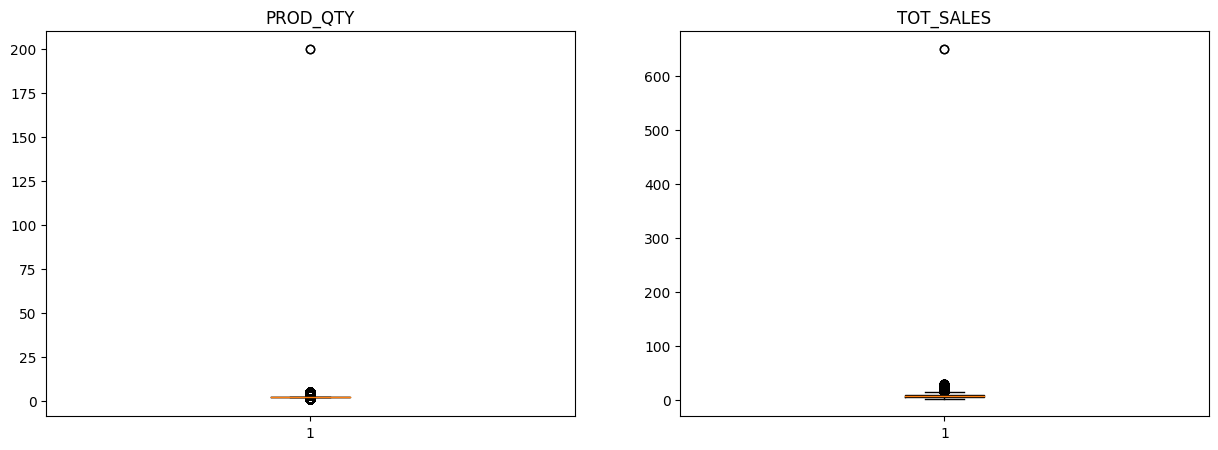

In [23]:
figure, axis=plt.subplots(1, 2, figsize=(15, 5))
axis[0].boxplot(transaction_data["PROD_QTY"])
axis[1].boxplot(transaction_data["TOT_SALES"])
axis[0].set_title("PROD_QTY")
axis[1].set_title("TOT_SALES")
plt.show()

In [24]:
transaction_data=transaction_data[transaction_data["PROD_QTY"]<100]
transaction_data=transaction_data[transaction_data["TOT_SALES"]<500]
transaction_data=transaction_data.reset_index(drop=True)    
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264829,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264830,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264831,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264832,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [47]:
date=transaction_data["DATE"].tolist()
for i in range(len(date)):
    date[i]=xlrd.xldate_as_datetime(date[i],0)
    
transaction_data["DATE"]=date
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18
...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019-03-09
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018-08-13
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018-11-06
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018-12-27


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18
...,...,...,...,...,...,...,...,...,...
264829,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019-03-09
264830,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018-08-13
264831,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018-11-06
264832,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018-12-27


In [29]:
purchase_behaviour=pd.read_csv("QVI_purchase_behaviour.csv")   
purchase_behaviour

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [31]:
purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [96]:
dataframe=pd.merge(transaction_data, purchase_behaviour, on="LYLTY_CARD_NBR")
dataframe

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,2018-11-10,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,2019-03-09,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019-03-09,YOUNG SINGLES/COUPLES,Premium
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018-08-13,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018-11-06,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018-12-27,YOUNG SINGLES/COUPLES,Premium


In [97]:
unique_products=list(dataframe["PROD_NAME"].unique())
print("Total Distinct Products:", len(unique_products))

Total Distinct Products: 114


In [98]:
dataframe["PROD_NAME_CLEAN"] = dataframe["PROD_NAME"].str.replace(r"\d+g", "", regex=True).str.strip()
dataframe["PROD_SIZE"] = dataframe["PROD_NAME"].str.extract(r"(\d+g)")
dataframe["PROD_NAME"] = dataframe["PROD_NAME_CLEAN"]
dataframe = dataframe.drop("PROD_NAME_CLEAN", axis=1)
dataframe["BRAND_NAME"] = dataframe["PROD_NAME"].str.split().str[0]
dataframe = dataframe.loc[:, ["DATE", "STORE_NBR", "LYLTY_CARD_NBR", "TXN_ID", "PROD_NBR", "PROD_NAME", "PROD_SIZE", "BRAND_NAME", "PROD_QTY", "TOT_SALES", "LIFESTAGE", "PREMIUM_CUSTOMER"]]
dataframe

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,175g,Natural,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,175g,CCs,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,160g,WW,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original,175g,CCs,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,170g,Smiths,2,2.9,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,175g,Kettle,2,10.8,YOUNG SINGLES/COUPLES,Premium
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,175g,Tostitos,1,4.4,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana,170g,Doritos,2,8.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,150g,Doritos,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [99]:
dataframe=dataframe.sort_values(by="DATE")
dataframe=dataframe.reset_index(drop=True)
dataframe

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,27,27181,24218,70,Tyrrells Crisps Lightly Salted,165g,Tyrrells,2,8.4,RETIREES,Budget
1,2018-07-01,191,191099,192367,103,RRD Steak & Chimuchurri,150g,RRD,2,5.4,YOUNG FAMILIES,Budget
2,2018-07-01,257,257010,255769,24,Grain Waves Sweet Chilli,210g,Grain,2,7.2,YOUNG FAMILIES,Premium
3,2018-07-01,48,48129,43842,114,Kettle Sensations Siracha Lime,150g,Kettle,2,9.2,OLDER FAMILIES,Mainstream
4,2018-07-01,203,203013,202339,23,Cheezels Cheese,330g,Cheezels,2,11.4,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-06-30,67,67129,64592,57,Old El Paso Salsa Dip Tomato Mild,300g,Old,2,10.2,OLDER SINGLES/COUPLES,Mainstream
264830,2019-06-30,133,133121,136776,44,Thins Chips Light& Tangy,175g,Thins,2,6.6,OLDER FAMILIES,Mainstream
264831,2019-06-30,257,257195,256935,83,WW D/Style Chip Sea Salt,200g,WW,2,3.8,YOUNG FAMILIES,Mainstream
264832,2019-06-30,45,45057,40739,91,CCs Tasty Cheese,175g,CCs,2,4.2,OLDER SINGLES/COUPLES,Premium


In [101]:
pd.date_range(start="2018-07-01", end="2019-06-30").difference(dataframe["DATE"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [102]:
dataframe=dataframe.append({"DATE": pd.to_datetime("2018-12-25"), "STORE_NBR": 0, "LYLTY_CARD_NBR": 0, "TXN_ID": 0, "PROD_NBR": 0, "PROD_NAME": "None", "BRAND_NAME": "None", "PROD_SIZE": "0g", "PROD_QTY": 0, "TOT_SALES": 0, "LIFESTAGE": "None", "PREMIUM_CUSTOMER": "None"}, ignore_index=True)
dataframe=dataframe.sort_values(by="DATE")
dataframe

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,27,27181,24218,70,Tyrrells Crisps Lightly Salted,165g,Tyrrells,2,8.4,RETIREES,Budget
478,2018-07-01,180,180179,182143,46,Kettle Original,175g,Kettle,2,10.8,RETIREES,Premium
479,2018-07-01,164,164069,164212,56,Cheezels Cheese Box,125g,Cheezels,2,4.2,OLDER FAMILIES,Premium
480,2018-07-01,179,179216,180709,24,Grain Waves Sweet Chilli,210g,Grain,2,7.2,RETIREES,Premium
481,2018-07-01,18,18221,15451,80,Natural ChipCo Sea Salt & Vinegr,175g,Natural,1,3.0,MIDAGE SINGLES/COUPLES,Premium
...,...,...,...,...,...,...,...,...,...,...,...,...
264340,2019-06-30,230,230022,232028,77,Doritos Corn Chips Nacho Cheese,170g,Doritos,2,8.8,YOUNG SINGLES/COUPLES,Mainstream
264341,2019-06-30,101,101071,100462,12,Natural Chip Co Tmato Hrb&Spce,175g,Natural,2,6.0,YOUNG SINGLES/COUPLES,Mainstream
264342,2019-06-30,141,141226,142472,47,Doritos Corn Chips Original,170g,Doritos,2,8.8,YOUNG SINGLES/COUPLES,Mainstream
264333,2019-06-30,162,162118,162544,42,Doritos Corn Chip Mexican Jalapeno,150g,Doritos,2,7.8,MIDAGE SINGLES/COUPLES,Mainstream


In [103]:
dataframe.loc[dataframe["DATE"]=="2018-12-25"]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
264834,2018-12-25,0,0,0,0,None,0g,None,0,0.0,None,None


In [56]:
date_sales=dataframe.groupby("DATE")["TOT_SALES"].sum().reset_index()
date_sales

,DATE,TOT_SALES
0,2018-07-01,5372.2
1,2018-07-02,5315.4
2,2018-07-03,5321.8
3,2018-07-04,5309.9
4,2018-07-05,5080.9
...,...,...
360,2019-06-26,5305.0
361,2019-06-27,5202.8
362,2019-06-28,5299.6
363,2019-06-29,5497.6


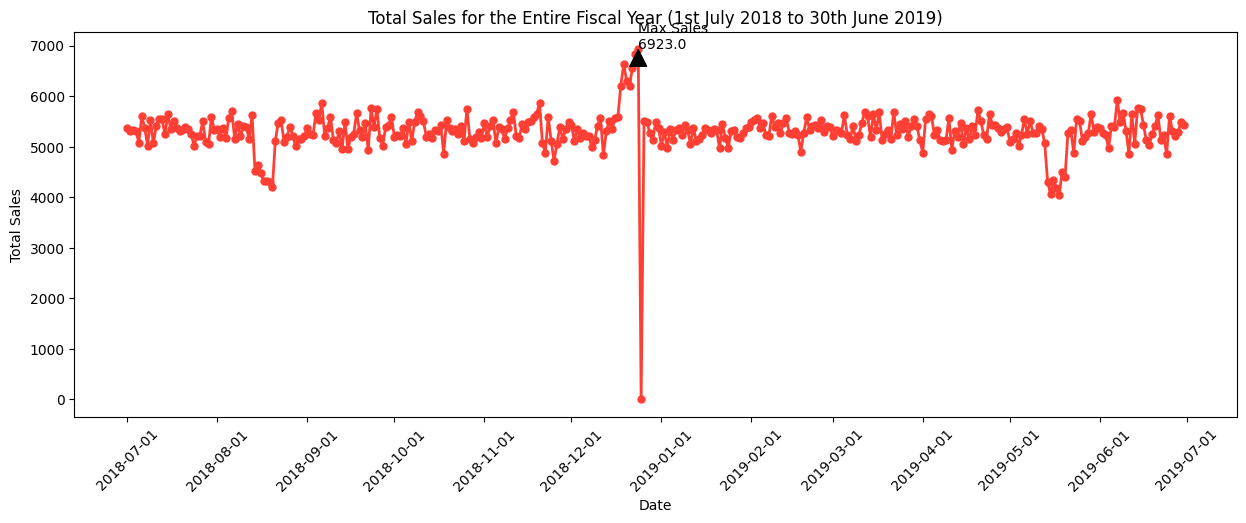

In [104]:

plt.figure(figsize=(15, 5))
plt.plot(date_sales["DATE"], date_sales["TOT_SALES"], color="#ff3f34", marker='o', linestyle='-', linewidth=2, markersize=5)
plt.title("Total Sales for the Entire Fiscal Year (1st July 2018 to 30th June 2019)")
plt.xlabel("Date")
plt.ylabel("Total Sales")


plt.xticks(rotation=45)





plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())


max_sales_date = date_sales.loc[date_sales['TOT_SALES'].idxmax(), 'DATE']
max_sales_value = date_sales['TOT_SALES'].max()
plt.annotate(f'Max Sales\n{max_sales_value}', xy=(max_sales_date, max_sales_value), xytext=(max_sales_date, max_sales_value + 10),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

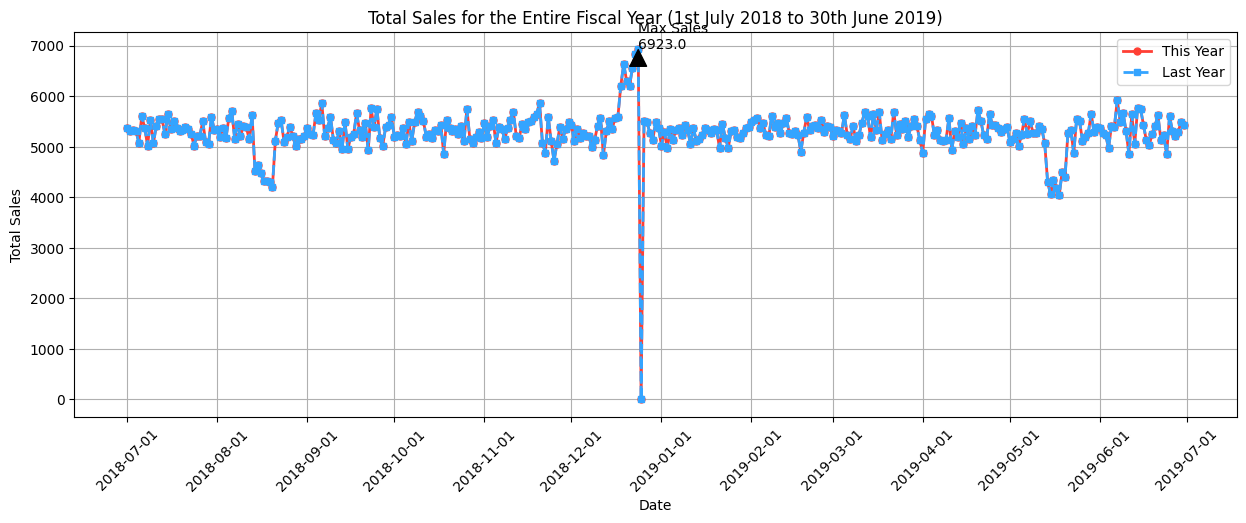

In [105]:
plt.figure(figsize=(15, 5))

plt.plot(date_sales["DATE"], date_sales["TOT_SALES"], color="#ff3f34", marker='o', linestyle='-', linewidth=2, markersize=5, label='This Year')
plt.plot(date_sales["DATE"], date_sales["TOT_SALES"], color="#34a4ff", marker='s', linestyle='--', linewidth=2, markersize=5, label='Last Year')

plt.title("Total Sales for the Entire Fiscal Year (1st July 2018 to 30th June 2019)")
plt.xlabel("Date")
plt.ylabel("Total Sales")


plt.xticks(rotation=45)


plt.grid(True)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

max_sales_date = date_sales.loc[date_sales['TOT_SALES'].idxmax(), 'DATE']
max_sales_value = date_sales['TOT_SALES'].max()
plt.annotate(f'Max Sales\n{max_sales_value}', xy=(max_sales_date, max_sales_value), xytext=(max_sales_date, max_sales_value + 10),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.legend()

plt.show()

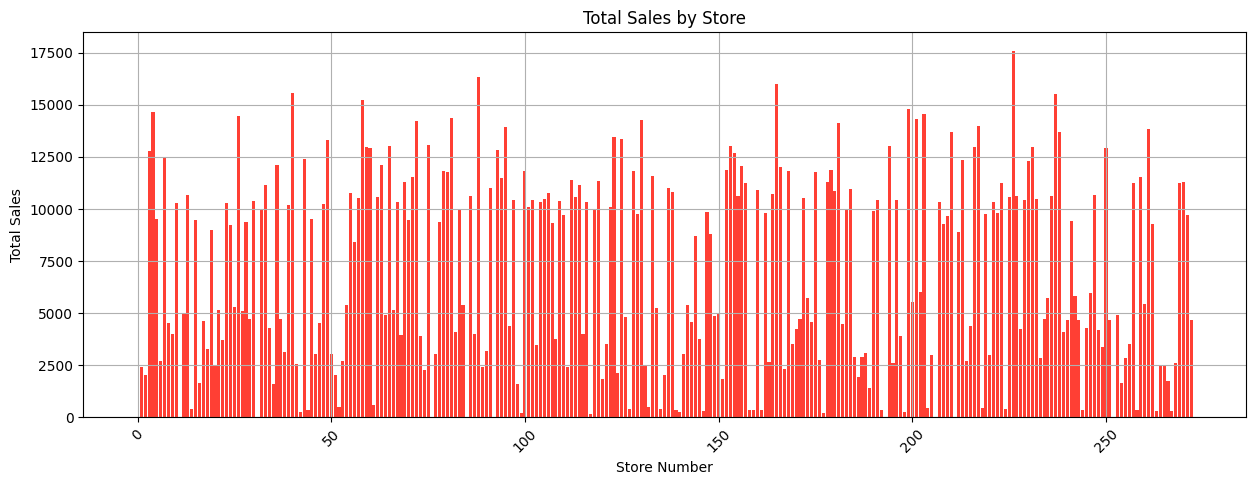

In [106]:
store_sales = dataframe.groupby('STORE_NBR')['TOT_SALES'].sum().reset_index()

plt.figure(figsize=(15, 5))
plt.bar(store_sales["STORE_NBR"], store_sales["TOT_SALES"], color="#ff3f34")
plt.title("Total Sales by Store")
plt.xlabel("Store Number")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

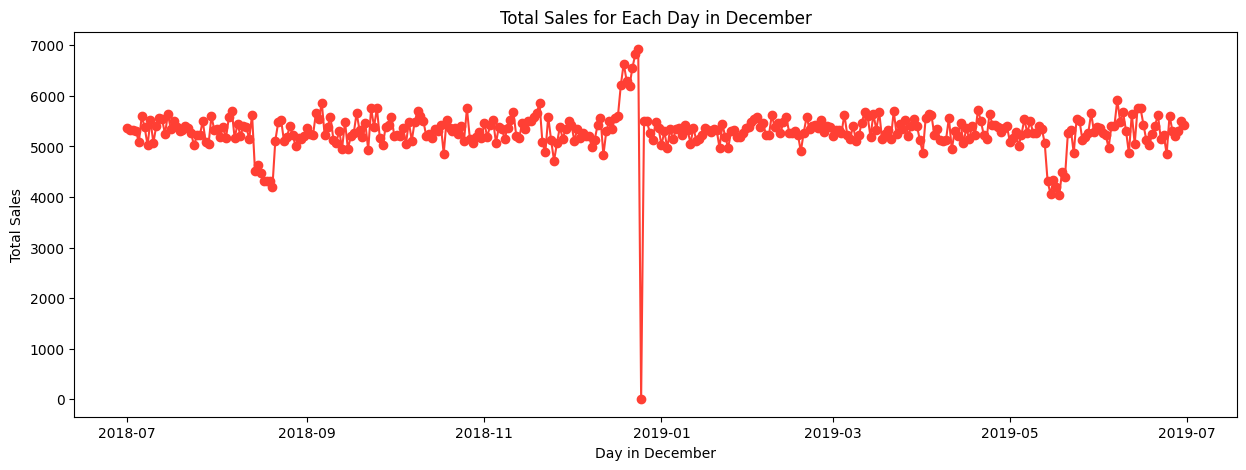

In [74]:
plt.figure(figsize=(15, 5))
plt.plot(date_sales['DATE'], date_sales['TOT_SALES'], color="#ff3f34", marker='o')
plt.title("Total Sales for Each Day in December")
plt.xlabel("Day in December")
plt.ylabel("Total Sales")
plt.show()


In [108]:
holiday_sales=dataframe[(dataframe["DATE"]>="2018-12-21") & (dataframe["DATE"]<="2018-12-24")]
holiday_sales=holiday_sales.sort_values(by="TOT_SALES",ascending=True)
holiday_sales=holiday_sales.reset_index(drop=True)
holiday_sales

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-12-24,38,38005,34012,35,Woolworths Mild Salsa,300g,Woolworths,1,1.5,OLDER FAMILIES,Budget
1,2018-12-22,127,127448,130458,76,Woolworths Medium Salsa,300g,Woolworths,1,1.5,OLDER FAMILIES,Mainstream
2,2018-12-22,136,136114,138499,35,Woolworths Mild Salsa,300g,Woolworths,1,1.5,OLDER SINGLES/COUPLES,Mainstream
3,2018-12-23,255,255077,254619,76,Woolworths Medium Salsa,300g,Woolworths,1,1.5,YOUNG FAMILIES,Budget
4,2018-12-22,186,186218,188613,76,Woolworths Medium Salsa,300g,Woolworths,1,1.5,RETIREES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
3608,2018-12-24,40,40152,36819,4,Dorito Corn Chp Supreme,380g,Dorito,2,13.0,OLDER SINGLES/COUPLES,Mainstream
3609,2018-12-24,217,217332,217772,4,Dorito Corn Chp Supreme,380g,Dorito,2,13.0,YOUNG FAMILIES,Mainstream
3610,2018-12-23,238,238351,243296,4,Dorito Corn Chp Supreme,380g,Dorito,2,13.0,YOUNG FAMILIES,Budget
3611,2018-12-24,3,3270,2289,4,Dorito Corn Chp Supreme,380g,Dorito,2,13.0,YOUNG FAMILIES,Budget


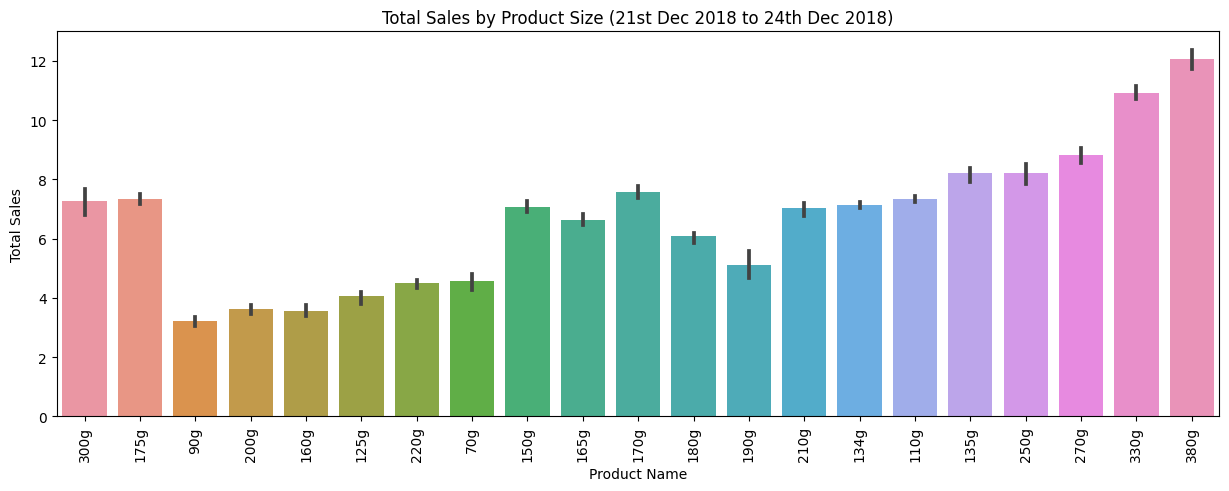

In [111]:
plt.figure(figsize=(15, 5))
sns.barplot(x="PROD_SIZE", y="TOT_SALES", data=holiday_sales)
plt.title("Total Sales by Product Size (21st Dec 2018 to 24th Dec 2018)")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

In [116]:
package_sales=dataframe.groupby("PROD_SIZE")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False)   
package_sales=package_sales.reset_index(drop=True)   
package_sales

,PROD_SIZE,TOT_SALES
0,175g,477112.4
1,150g,296609.7
2,134g,177655.5
3,110g,162765.4
4,170g,146673.0
5,330g,136794.3
6,300g,113330.6
7,165g,101360.6
8,380g,75419.6
9,270g,55425.4


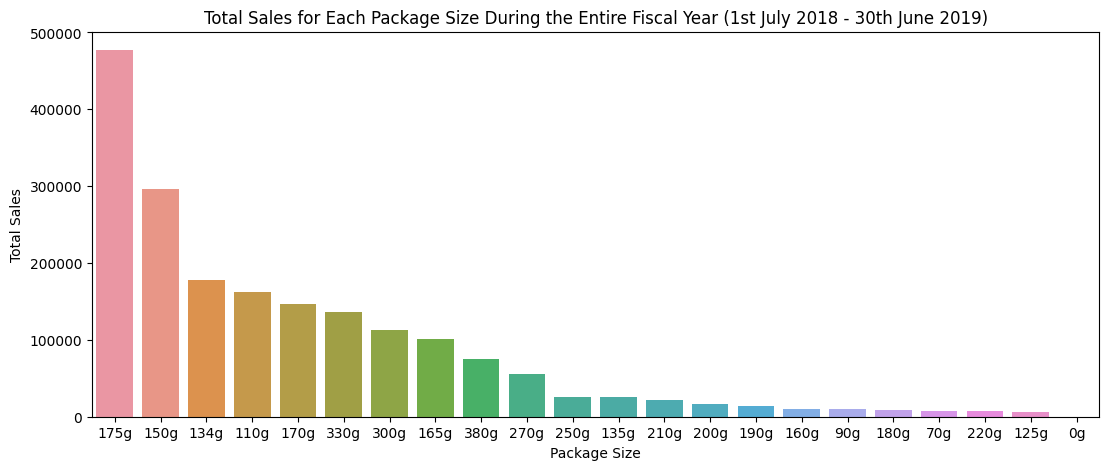

In [117]:
plt.figure(figsize=(13, 5))
sns.barplot(x="PROD_SIZE", y="TOT_SALES", data=package_sales)
plt.title("Total Sales for Each Package Size During the Entire Fiscal Year (1st July 2018 - 30th June 2019)")
plt.xlabel("Package Size")
plt.ylabel("Total Sales")
plt.show()

In [118]:
dataframe["LIFESTAGE"].value_counts()


OLDER SINGLES/COUPLES     54479
RETIREES                  49763
OLDER FAMILIES            48594
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
None                          1
Name: LIFESTAGE, dtype: int64

In [119]:
customer_sales=dataframe.groupby("LIFESTAGE")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False)   
customersales=customer_sales.reset_index(drop=True)   
customer_sales

,LIFESTAGE,TOT_SALES
4,OLDER SINGLES/COUPLES,402426.75
5,RETIREES,366470.90
3,OLDER FAMILIES,352467.20
6,YOUNG FAMILIES,316160.10
7,YOUNG SINGLES/COUPLES,260405.30
0,MIDAGE SINGLES/COUPLES,184751.30
1,NEW FAMILIES,50433.45
2,None,0.00


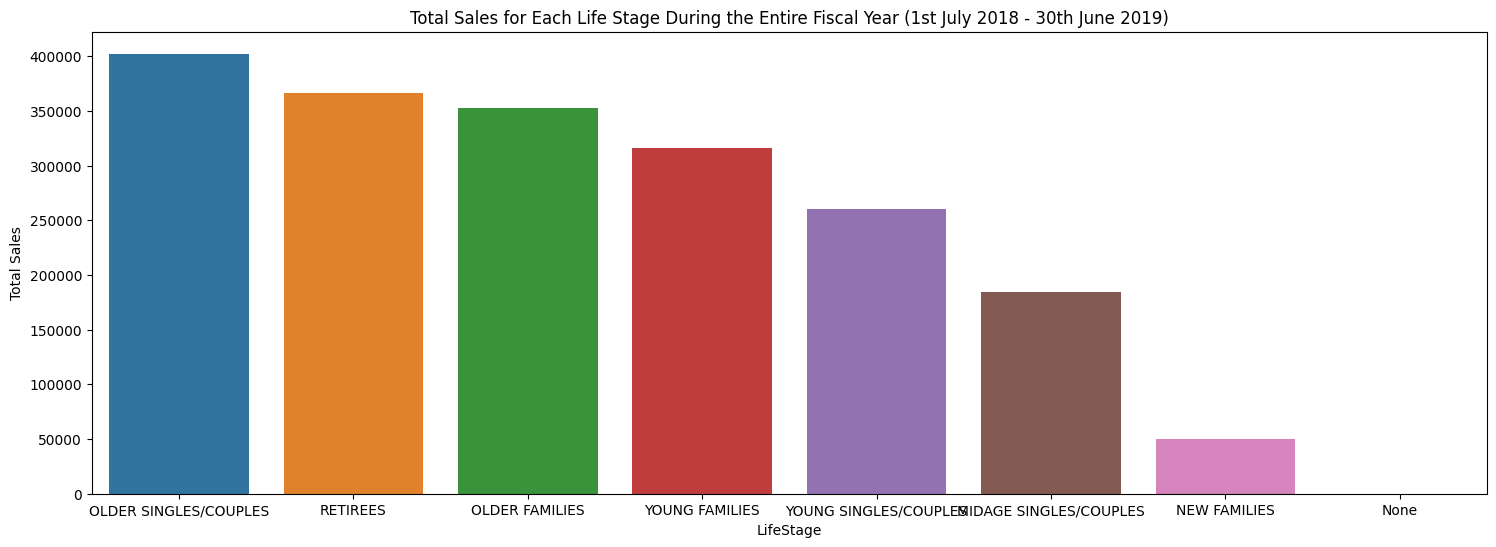

In [121]:
plt.figure(figsize=(18, 6))
sns.barplot(x="LIFESTAGE", y="TOT_SALES", data=customer_sales)
plt.title("Total Sales for Each Life Stage During the Entire Fiscal Year (1st July 2018 - 30th June 2019)")
plt.xlabel("LifeStage")
plt.ylabel("Total Sales")
plt.show()

In [122]:
lifestage_sales=dataframe.groupby(["LIFESTAGE", "DATE"])["TOT_SALES"].sum().reset_index()  #   Grouping the pandas.DataFrame by the TOT_SALES column for each lifestage and date.
lifestage_sales=lifestage_sales[lifestage_sales["LIFESTAGE"]!="None"]   #   Removing the entries with the lifestage "None" from the pandas.DataFrame.
lifestage_sales

,LIFESTAGE,DATE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,2018-07-01,576.8
1,MIDAGE SINGLES/COUPLES,2018-07-02,589.5
2,MIDAGE SINGLES/COUPLES,2018-07-03,482.2
3,MIDAGE SINGLES/COUPLES,2018-07-04,604.5
4,MIDAGE SINGLES/COUPLES,2018-07-05,531.6
...,...,...,...
2544,YOUNG SINGLES/COUPLES,2019-06-26,687.4
2545,YOUNG SINGLES/COUPLES,2019-06-27,743.4
2546,YOUNG SINGLES/COUPLES,2019-06-28,840.7
2547,YOUNG SINGLES/COUPLES,2019-06-29,924.5


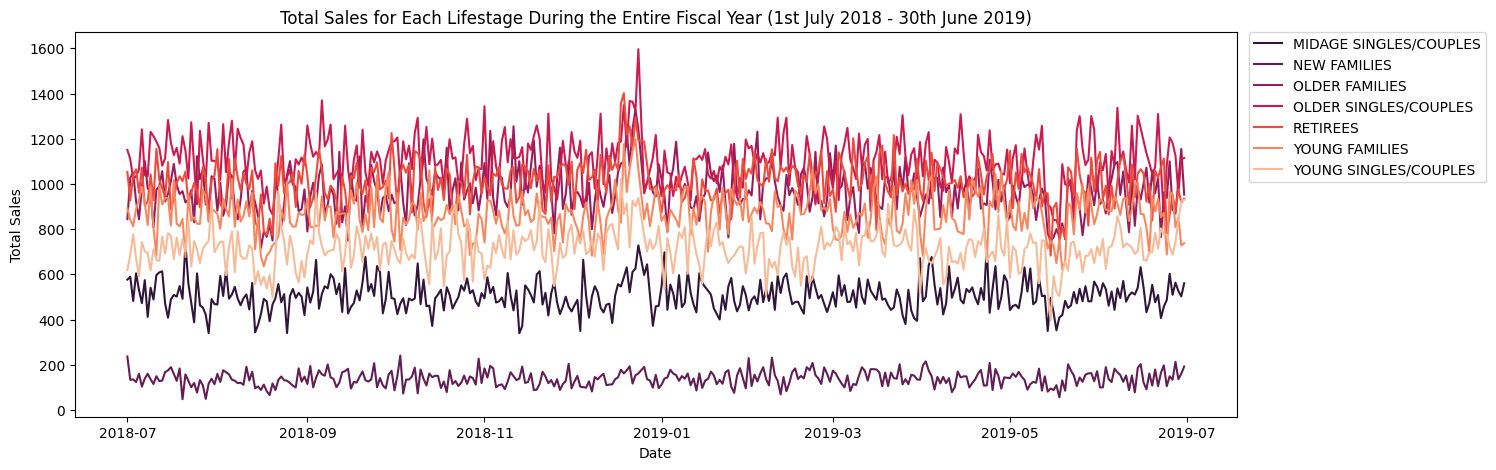

In [123]:
plt.figure(figsize=(15, 5))
sns.lineplot(x="DATE", y="TOT_SALES", hue="LIFESTAGE", data=lifestage_sales, palette="rocket")
plt.title("Total Sales for Each Lifestage During the Entire Fiscal Year (1st July 2018 - 30th June 2019)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

In [124]:
lifestage_segment=dataframe.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index().sort_values(by=["LIFESTAGE", "TOT_SALES"], ascending=[True, False]) #   Grouping the pandas.DataFrame by the TOT_SALES column for each lifestage and customer segment, and sorting it in descending order of the TOT_SALES column.
lifestage_segment=lifestage_segment[lifestage_segment["LIFESTAGE"]!="None"] #   Removing the entries with the lifestage "None" from the pandas.DataFrame.
lifestage_segment=lifestage_segment.reset_index(drop=True)  #   Resetting the index of the pandas.DataFrame.
lifestage_segment

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Mainstream,90803.85
1,MIDAGE SINGLES/COUPLES,Premium,58432.65
2,MIDAGE SINGLES/COUPLES,Budget,35514.80
3,NEW FAMILIES,Budget,21928.45
4,NEW FAMILIES,Mainstream,17013.90
5,NEW FAMILIES,Premium,11491.10
6,OLDER FAMILIES,Budget,168363.25
7,OLDER FAMILIES,Mainstream,103445.55
8,OLDER FAMILIES,Premium,80658.40
9,OLDER SINGLES/COUPLES,Budget,136769.80


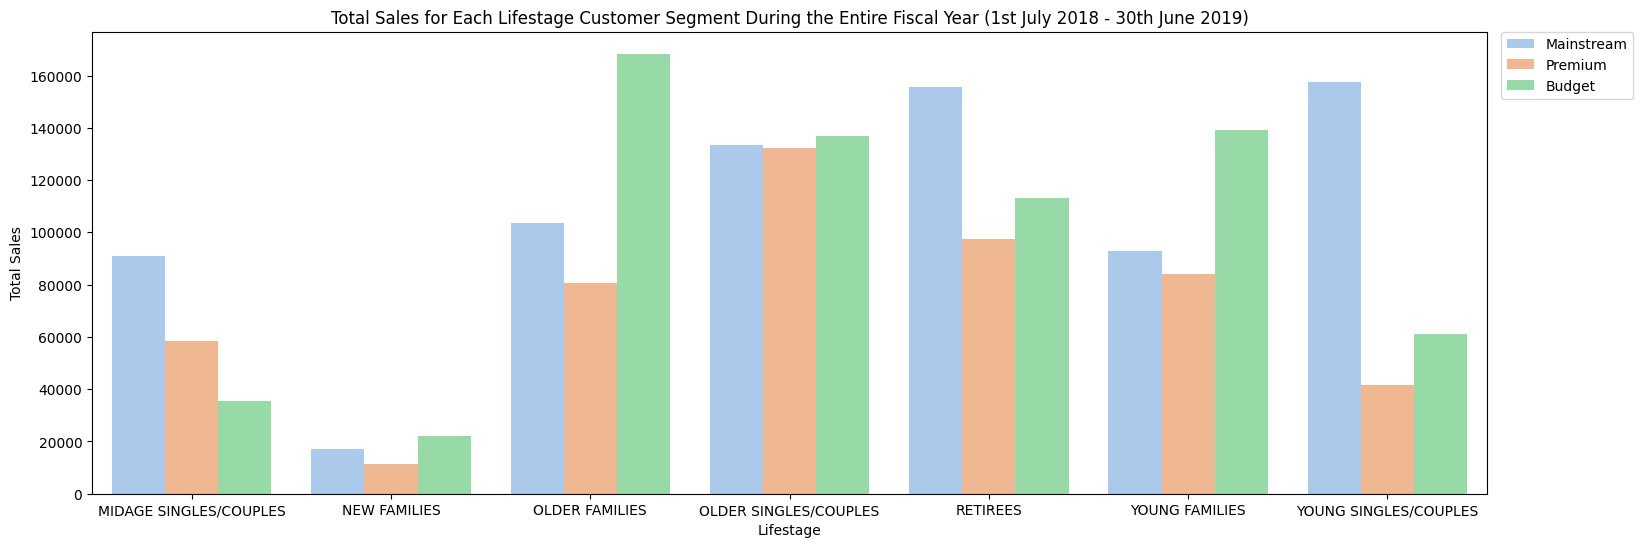

In [125]:
plt.figure(figsize=(18, 6))
sns.barplot(x="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER", data=lifestage_segment, palette="pastel")
plt.title("Total Sales for Each Lifestage Customer Segment During the Entire Fiscal Year (1st July 2018 - 30th June 2019)")
plt.xlabel("Lifestage")
plt.ylabel("Total Sales")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

In [126]:
lifestage_brands=dataframe.groupby(["LIFESTAGE", "BRAND_NAME", "PREMIUM_CUSTOMER", "PROD_SIZE"])["TOT_SALES"].sum().reset_index().sort_values(by=["LIFESTAGE", "TOT_SALES"], ascending=[True, False])  #   Grouping the pandas.DataFrame by the TOT_SALES column for each lifestage and brand, and sorting it in descending order of the TOT_SALES column.
lifestage_brands=lifestage_brands[lifestage_brands["LIFESTAGE"]!="None"]    #   Removing the entries with the lifestage "None" from the pandas.DataFrame.
lifestage_brands=lifestage_brands.reset_index(drop=True)    #   Resetting the index of the pandas.DataFrame.
midage=lifestage_brands[lifestage_brands["LIFESTAGE"]=="MIDAGE SINGLES/COUPLES"]    #   Storing the entries for MIDAGE SINGLES/COUPLES into a separate pandas.DataFrame.
midage

,LIFESTAGE,BRAND_NAME,PREMIUM_CUSTOMER,PROD_SIZE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Kettle,Mainstream,175g,10557.0
1,MIDAGE SINGLES/COUPLES,Kettle,Mainstream,150g,8381.2
2,MIDAGE SINGLES/COUPLES,Pringles,Mainstream,134g,8177.0
3,MIDAGE SINGLES/COUPLES,Kettle,Premium,175g,5815.8
4,MIDAGE SINGLES/COUPLES,Pringles,Premium,134g,5538.9
...,...,...,...,...,...
133,MIDAGE SINGLES/COUPLES,Snbts,Mainstream,90g,120.7
134,MIDAGE SINGLES/COUPLES,Cheezels,Budget,125g,105.0
135,MIDAGE SINGLES/COUPLES,Sunbites,Mainstream,90g,103.7
136,MIDAGE SINGLES/COUPLES,Sunbites,Budget,90g,96.9


In [127]:
rfm=dataframe.groupby("LYLTY_CARD_NBR")["TOT_SALES"].agg(["sum", "count"]).reset_index()    #   Grouping the pandas.DataFrame by the TOT_SALES column for each customer, and aggregating the sum and count.
rfm.columns=["LYLTY_CARD_NBR", "MONETARY", "FREQUENCY"] #   Renaming the columns of the pandas.DataFrame.
rfm["RECENCY"]=(datetime.datetime.strptime("2019-06-30", "%Y-%m-%d")-dataframe.groupby("LYLTY_CARD_NBR")["DATE"].max()).dt.days #   Calculating the Recency value for each customer.
rfm=rfm.dropna()    #   Dropping the null values from the pandas.DataFrame.
rfm=rfm.reset_index(drop=True)

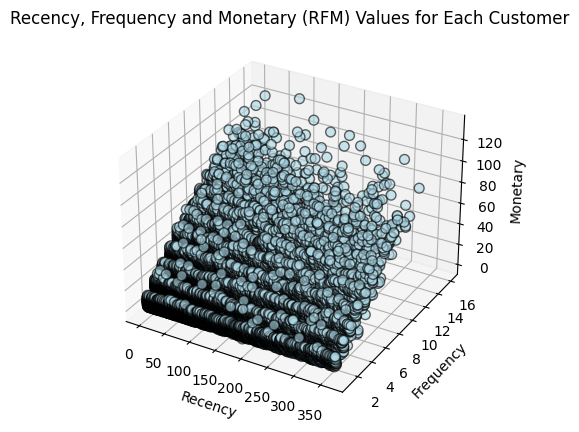

In [128]:
figure=plt.figure(figsize=(15, 5))
axis=figure.add_subplot(111, projection="3d")
axis.scatter(rfm["RECENCY"], rfm["FREQUENCY"], rfm["MONETARY"], c="lightblue", s=50, alpha=0.6, edgecolors="black", linewidth=1, marker="o")
axis.set_xlabel("Recency")
axis.set_ylabel("Frequency")
axis.set_zlabel("Monetary")
plt.title("Recency, Frequency and Monetary (RFM) Values for Each Customer")
plt.show()

In [129]:
dataframe.to_csv("QVI_data.csv", index=False)